In [1]:
import numpy as np
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
import keras.backend as K
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
import random

Using TensorFlow backend.


In [2]:
print(K.image_data_format())

channels_last


In [3]:
model = load_model('/home/ofenrohr/arbeit/master/code/alphaDots/stageOne/model/train-checkpoint.h5')

In [4]:
firstTryDataset = np.load('stageOne5x4hard.npz')
x_train = firstTryDataset['x_train']
y_train = firstTryDataset['y_train']

print("original data:")
print(x_train[0])
print(y_train[0])
print(x_train.shape)
print(y_train.shape)


print("\nnormalized data:")
sp = x_train.shape
x_train = x_train.reshape((sp[0],sp[1],sp[2],1))
sp = y_train.shape
y_train = y_train.reshape((sp[0],sp[1],sp[2],1))

x_train = x_train.astype(K.floatx())
y_train = y_train.astype(K.floatx())
#x_train = np.true_divide(x_train,255.0)
x_train /= 255
y_train /= 255

np.set_printoptions(precision=2)
print(np.transpose(x_train[0]))
print(np.transpose(y_train[0]))
print(x_train.shape)
print(y_train.shape)

original data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 215   0 215   0 215   0 215   0 215   0 215   0]
 [  0   0   0   0   0 255   0   0   0   0   0 255   0]
 [  0 215   0 215   0 215   0 215   0 215   0 215   0]
 [  0   0   0 255   0   0   0   0   0 255   0   0   0]
 [  0 215   0 215   0 215 255 215 255 215   0 215   0]
 [  0   0   0   0   0   0   0 255   0   0   0   0   0]
 [  0 215   0 215   0 215   0 215   0 215 255 215   0]
 [  0 255   0   0   0   0   0   0   0   0   0   0   0]
 [  0 215   0 215   0 215   0 215 255 215 255 215   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0

In [5]:
y_cat = to_categorical(y_train).reshape(y_train.shape[0], y_train.shape[1], y_train.shape[2], 2)
print(y_cat.shape)
print(y_cat[0,:,:,0])
print(y_cat[0,:,:,1])

(1000000, 11, 13, 2)
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

input: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  84 100  84   0  84   0  84   0  84   0  84   0]
 [  0   0   0   0   0   0   0   0   0   0   0 100   0]
 [  0  84   0  84 100  84 100  84 100  84   0  84   0]
 [  0   0   0 100   0   0   0 100   0 100   0   0   0]
 [  0  84   0  84   0  84   0  84   0  84   0  84   0]
 [  0   0   0   0   0 100   0 100   0   0   0   0   0]
 [  0  84   0  84   0  84   0  84 100  84   0  84   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  84 100  84 100  84 100  84   0  84   0  84   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]]
prediction: 
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  1  0  1  0  2  0  0]
 [ 0  3  0  2  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  2  0  1  0  0  0 33  0  0  0  0]
 [ 0  2  0  2  0  0  0  0  0  1  0  2  0]
 [ 0  0  2  0  1  0  2  0  0  0  2  0  0]
 [ 0  2  0  1  0  1  0  1  0  0  0  3

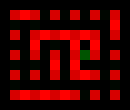

In [9]:
example = random.randrange(x_train.shape[0])

input_data = np.array([x_train[example]])


prediction = model.predict(input_data)

# print input data
input_data_print = x_train[example,:,:,0] * 100
input_data_print = input_data_print.astype(np.uint8)
print("input: ")
print(input_data_print)

# generate greyscale image data from input data
target_imgdata = x_train[example,:,:,0] * 255
target_imgdata = target_imgdata.astype(np.uint8)

# print prediction
prediction_data_print = prediction[0,:,:,1] * 100 
prediction_data_print = prediction_data_print.astype(np.uint8)
print("prediction: ")
print(prediction_data_print)

# generate greyscale image data from prediction data
prediction_imgdata = prediction[0] * 255
prediction_imgdata = prediction_imgdata.astype(np.uint8)

# merge image data in color channels
tmp = np.zeros((prediction[0].shape[0], prediction[0].shape[1]), dtype=np.uint8)
merged_imgdata = np.stack([target_imgdata, prediction_imgdata[:,:,1], tmp], axis=2)

#create image
img = Image.fromarray(merged_imgdata, 'RGB')
img = img.resize(size=(img.size[0]*10, img.size[1]*10))

img

## Export the model
Save the model. Export it with Keras's save method for use in the modelServer. The modelServer will provide the model's prediction function as a local Service for KSquares.

In [9]:
model_path = "model/model-firstTry.h5"
model_json = model.save(model_path)
img_path = "model/model-firstTry.png"
plot_model(model, to_file=img_path)

In [12]:
signature = tf.saved_model.signature_def_utils.predict_signature_def(
    inputs={'image': model.input}, 
    outputs={'scores': model.output})     

builder = tf.saved_model.builder.SavedModelBuilder('model/tensorflow')                                                                    
builder.add_meta_graph_and_variables(                                                                                                        
    sess=K.get_session(),                                                                                                                    
    tags=[tf.saved_model.tag_constants.SERVING],                                                                                             
    signature_def_map={                                                                                                                      
        tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY:                                                                
            signature                                                                                                                        
    })                                                                                                                                       
builder.save()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/tensorflow/saved_model.pb


'model/tensorflow/saved_model.pb'